In [1]:
from google.colab import drive
import pandas as pd
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Clone the repository
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

# Navigate to the dataset directory
%cd GroceryStoreDataset/dataset/iconic-images-and-descriptions/


Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6559/6559), 116.26 MiB | 36.71 MiB/s, done.
Resolving deltas: 100% (275/275), done.
/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions


In [35]:
ls

Alpro-Blueberry-Soyghurt_Iconic.jpg                Honeydew-Melon_Iconic.jpg
Alpro-Fresh-Soy-Milk_Iconic.jpg                    Kaiser_Iconic.jpg
Alpro-Shelf-Soy-Milk_Iconic.jpg                    Kiwi_Iconic.jpg
Alpro-Vanilla-Soyghurt_Iconic.jpg                  Leek_Iconic.jpg
Anjou_Iconic.jpg                                   Lemon_Iconic.jpg
Arla-Ecological-Medium-Fat-Milk_Iconic.jpg         Lime_Iconic.jpg
Arla-Ecological-Sour-Cream_Iconic.jpg              Mango_Iconic.jpg
Arla-Lactose-Medium-Fat-Milk_Iconic.jpg            Nectarine_Iconic.jpg
Arla-Medium-Fat-Milk_Iconic.jpg                    Oatly-Natural-Oatghurt_Iconic.jpg
Arla-Mild-Vanilla-Yoghurt_Iconic.jpg               Oatly-Oat-Milk_Iconic.jpg
Arla-Natural-Mild-Low-Fat-Yoghurt_Iconic.jpg       Orange-Bell-Pepper_Iconic.jpg
Arla-Natural-Yoghurt_Iconic.jpg                    Orange_Iconic.jpg
Arla-Sour-Cream_Iconic.jpg                         Papaya_Iconic.jpg
Arla-Sour-Milk_Iconic.jpg                          Passion-Fruit

In [31]:
import os
from PIL import Image

# Dataset folder path
current_directory = os.getcwd()

# Images folder path
images_folder = os.path.join("images")

# Create the "images" folder if it doesn't exist
if not os.path.exists(images_folder):
    os.makedirs(images_folder)
    print(f"Created 'images' folder.")

# Check if the dataset folder exists (assuming it's defined somewhere in your code)
dataset_folder = "your_dataset_folder_path_here"
if not os.path.exists(dataset_folder):
    print("Dataset folder does not exist.")
else:
    print("Dataset folder exists.")

# Loop through all files in the current directory
for root, dirs, files in os.walk(current_directory):
    for file in files:
        if file.endswith("Iconic.jpg"):
            file_path = os.path.join(root, file)
            shutil.move(file_path, images_folder)
            print(f"Moved '{file}' to '{images_folder}'")
            # Convert the image to .png
            img = Image.open(os.path.join(images_folder, file))
            png_file_path = os.path.splitext(file_path)[0] + ".png"
            img.save(png_file_path, "PNG")
            print(f"Converted '{file}' to '{png_file_path}'")

print("All images moved to the 'images' folder and converted to .png.")


Created 'images' folder.
Dataset folder does not exist.
Moved 'Ginger_Iconic.jpg' to 'images'
Converted 'Ginger_Iconic.jpg' to '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Ginger/Ginger_Iconic.png'
Moved 'Cucumber_Iconic.jpg' to 'images'
Converted 'Cucumber_Iconic.jpg' to '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Cucumber/Cucumber_Iconic.png'
Moved 'Vine-Tomato_Iconic.jpg' to 'images'
Converted 'Vine-Tomato_Iconic.jpg' to '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Tomato/Vine-Tomato/Vine-Tomato_Iconic.png'
Moved 'Regular-Tomato_Iconic.jpg' to 'images'
Converted 'Regular-Tomato_Iconic.jpg' to '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Tomato/Regular-Tomato/Regular-Tomato_Iconic.png'
Moved 'Beef-Tomato_Iconic.jpg' to 'images'
Converted 'Beef-Tomato_Iconic.jpg' to '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/T

In [36]:
cd iconic-images-and-descriptions/

/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions


In [37]:
import os
import shutil

def check_and_create_brand_folder(product_folder):
    brand_folders = [folder for folder in os.listdir(product_folder) if os.path.isdir(os.path.join(product_folder, folder))]

    # If there are no brand folders, create NoBrand folder
    if not brand_folders:
        no_brand_folder = os.path.join(product_folder, "NoBrand")
        if not os.path.exists(no_brand_folder):
            os.makedirs(no_brand_folder)

            # Move all files in the product folder to the NoBrand folder
            for item in os.listdir(product_folder):
                item_path = os.path.join(product_folder, item)
                if os.path.isfile(item_path):
                    shutil.move(item_path, no_brand_folder)

            print(f"No brand folders found. Created 'NoBrand' folder in '{product_folder}' and moved files.")
            return no_brand_folder
        else:
            print(f"'NoBrand' folder already exists in '{product_folder}'")
            return no_brand_folder
    else:
        return os.path.join(product_folder, brand_folders[0])  # Return the first brand folder found

# Get the current working directory
current_directory = os.getcwd()

# Dataset folder path within Google Drive
dataset_folder = "/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions"

# Loop through all category folders
for category_folder in os.listdir(dataset_folder):
    category_folder_path = os.path.join(dataset_folder, category_folder)
    if os.path.isdir(category_folder_path):
        print(f"Processing category folder: {category_folder_path}")

        # Loop through all product folders
        for product_folder in os.listdir(category_folder_path):
            product_folder_path = os.path.join(category_folder_path, product_folder)
            if os.path.isdir(product_folder_path):
                print(f"Processing product folder: {product_folder_path}")

                # Check and create NoBrand folder if needed
                brand_folder_path = check_and_create_brand_folder(product_folder_path)
                print(f"Brand folder: {brand_folder_path}")


Processing category folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/images
Processing category folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables
Processing product folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Ginger
No brand folders found. Created 'NoBrand' folder in '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Ginger' and moved files.
Brand folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Ginger/NoBrand
Processing product folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Cucumber
No brand folders found. Created 'NoBrand' folder in '/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Cucumber' and moved files.
Brand folder: /content/GroceryStoreDataset/dataset/iconic-images-and-descriptions/Vegetables/Cucumber/NoBrand
Processing product folder: /

/content/GroceryStoreDataset/dataset/iconic-images-and-descriptions


In [14]:
from google.colab import files

# Zip file name
zip_file_name = "images.zip"

# Download the zip file
files.download(zip_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# Create DataFrame
products_database = pd.DataFrame(columns=['product_category', 'product_category_type', 'product_category_type_brand',
                                          'product_category_type_brand_description', 'product_category_type_brand_information'])

# Define the function to extract information from folders
def process_folder(product_category, product_category_type, product_category_type_folder):

    for product_category_type_brand in os.listdir(product_category_type_folder):
        product_category_type_brand_folder = os.path.join(product_category_type_folder, product_category_type_brand)
        if os.path.isdir(product_category_type_brand_folder):

            product_category_type_brand_description = None
            product_category_type_brand_information = None

            # Check if description or information files exist directly in the product_category_type_folder
            description_file_path = os.path.join(product_category_type_folder, f"{product_category_type_brand}_Description.txt")
            information_file_path = os.path.join(product_category_type_folder, f"{product_category_type_brand}_Information.txt")
            if os.path.isfile(description_file_path):
                with open(description_file_path, 'r') as f:
                    product_category_type_brand_description = f.read().strip()
            if os.path.isfile(information_file_path):
                with open(information_file_path, 'r') as f:
                    product_category_type_brand_information = f.read().strip()

                # Append the extracted information to the DataFrame
                products_database.loc[len(products_database)] = [product_category, product_category_type, product_category_type_brand, product_category_type_brand_description, product_category_type_brand_information]

            # Check if description or information files exist in the product_category_type_brand_folder
            for file_name in os.listdir(product_category_type_brand_folder):
                file_path = os.path.join(product_category_type_brand_folder, file_name)
                if os.path.isfile(file_path):
                    if file_name.lower().endswith(('description.txt', 'information.txt')):
                        with open(file_path, 'r') as f:
                            content = f.read().strip()
                            if file_name.lower().endswith('description.txt'):
                                product_category_type_brand_description = content
                            elif file_name.lower().endswith('information.txt'):
                                product_category_type_brand_information = content

            # Append the extracted information to the DataFrame
            products_database.loc[len(products_database)] = [product_category, product_category_type, product_category_type_brand, product_category_type_brand_description, product_category_type_brand_information]

# Process each category folder
categories = ['Fruit', 'Packages', 'Vegetables']
for category in categories:
    category_path = os.path.join(os.getcwd(), category)
    try:
        if os.path.isdir(category_path):
            for product_category_type in os.listdir(category_path):
                product_category_type_path = os.path.join(category_path, product_category_type)
                if os.path.isdir(product_category_type_path):
                    process_folder(category, product_category_type, product_category_type_path)
    except Exception as e:
        print(f"Error processing category {category}: {e}")

products_database


,product_category,product_category_type,product_category_type_brand,product_category_type_brand_description,product_category_type_brand_information
0,Fruit,Mango,NoBrand,"Mango has a fresh, powerful and sweet taste, b...",Title: Mango Class 1 \nCountry: Mexico \nDescr...
1,Fruit,Lemon,NoBrand,Lemon is used as a flavor in food and drinks a...,Title: Lemon Class 1 \nCountry: Spain \nDescri...
2,Fruit,Passion-Fruit,NoBrand,"Passion fruit is a small, round or oval fruit ...",Title: Passion fruit Class 1 \nCountry: Colomb...
3,Fruit,Avocado,NoBrand,Avocado is a fruit with a clear core in the mi...,Title: Avocado Class 1 \nCountry: Peru \nDescr...
4,Fruit,Pineapple,NoBrand,Pineapple fits well to be eaten naturally in f...,Title: Pineapple Klass 1 \nCountry: Costa Rica...
...,...,...,...,...,...
76,Vegetables,Garlic,NoBrand,"Garlic has unique flavor and smell, and is a g...",Title: Garlic Class 1 \nCountry and volume: Ch...
77,Vegetables,Zucchini,NoBrand,"Zucchini can be eaten raw, but is usually used...",Title: Zucchini Class 1 \nCountry: Spain \nDes...
78,Vegetables,Onion,Yellow-Onion,Yellow onion is a good flavoring. Fits well bo...,Title: Onion Yellow Class 1 \nCountry and volu...
79,Vegetables,Carrots,NoBrand,The orange red color of the carrot comes from ...,Title: Carrot Class 1 \nCountry and volume: Th...


In [65]:
products_database

,product_category,product_category_type,product_category_type_brand,product_category_type_brand_description,product_category_type_brand_information
0,Fruit,Mango,NoBrand,"Mango has a fresh, powerful and sweet taste, b...",Title: Mango Class 1 \nCountry: Mexico \nDescr...
1,Fruit,Lemon,NoBrand,Lemon is used as a flavor in food and drinks a...,Title: Lemon Class 1 \nCountry: Spain \nDescri...
2,Fruit,Passion-Fruit,NoBrand,"Passion fruit is a small, round or oval fruit ...",Title: Passion fruit Class 1 \nCountry: Colomb...
3,Fruit,Avocado,NoBrand,Avocado is a fruit with a clear core in the mi...,Title: Avocado Class 1 \nCountry: Peru \nDescr...
4,Fruit,Pineapple,NoBrand,Pineapple fits well to be eaten naturally in f...,Title: Pineapple Klass 1 \nCountry: Costa Rica...
...,...,...,...,...,...
76,Vegetables,Garlic,NoBrand,"Garlic has unique flavor and smell, and is a g...",Title: Garlic Class 1 \nCountry and volume: Ch...
77,Vegetables,Zucchini,NoBrand,"Zucchini can be eaten raw, but is usually used...",Title: Zucchini Class 1 \nCountry: Spain \nDes...
78,Vegetables,Onion,Yellow-Onion,Yellow onion is a good flavoring. Fits well bo...,Title: Onion Yellow Class 1 \nCountry and volu...
79,Vegetables,Carrots,NoBrand,The orange red color of the carrot comes from ...,Title: Carrot Class 1 \nCountry and volume: Th...


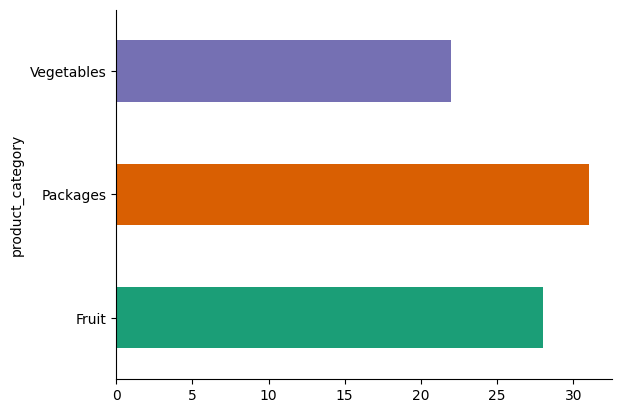

In [56]:
# @title product_category

from matplotlib import pyplot as plt
import seaborn as sns
products_database.groupby('product_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
csv_filename = 'products_database.csv'
products_database.to_csv(csv_filename, index=False)

# Download the CSV file
from google.colab import files
files.download(csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
import json

json_filename = 'products_database.json'
products_database.to_json(json_filename, orient='records')

# Download the JSON file
from google.colab import files
files.download(json_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>